# **Background: Classification of fire vs no-fire vs lake images**
In this miniproject you will attempt to identify fires from aerial vehicle cameras.
From the dataset creators, "Wildfires are one of the deadliest and dangerous natural disasters in the world. Wildfires burn millions of forests and they put many lives of humans and animals in danger. Predicting fire behavior can help firefighters to have better fire management and scheduling for future incidents and also it reduces the life risks for the firefighters. Recent advance in aerial images shows that they can be beneficial in wildfire studies. Among different methods and technologies for aerial images, Unmanned Aerial Vehicles (UAVs) and drones are beneficial to collect information regarding the fire."

### **Specific Task: Binary Classification**
Develop a machine learning classifier that can accurately perform the ternary classification Fire vs No Fire vs Lake

## **Preprocess Data Overview**

The data was obtained by recording a prescribed burning region using an aerial vehicle hence the original data is in the form of a video and the individual frames forms the basis of our dataset. Although we were given roughly 40,000 images, there is a lots of similarity between most of the images therefore the best choice (for reducing the size of the dataset and hence being less computational expensive) is to select a variation of images and neglect the repeated images.

For the ternary classification of fire vs no-fire images, we have taken a total of 1200 training images that consists of 400 training images of the fire class ,400 training images of the no-fire class and 400 training images of lake class. Furthermore, we have taken a total of 600 testing images that consists of 200 testing images of the fire class, 200 testing images of the no-fire class and 200 testing images of the lake class. We also ensure that we have normalise our images by dividing by 255.0.

Our decision to increases both the number of training and testing images is because with a ternary classification system, we are introducing a third category, which inherently increases the complexity of the patterns the model needs to learn. A larger dataset provides more examples for each of the three classes, enabling the model to better understand the nuances and variability within and across these categories.

For ternary labels, we have decided to use 0,1,2 corresponding to fire, no-fire class and lake respectively.

We have form our training dataset by concatenating the fire, no-fire and lake train images together (similarly for testing dataset). After, we have use sklearn library function to shuffle our dataset such that the mapping between the binary labels (0,1,2) to the training dataset is consistent (similarly for testing dataset).

To enhance our dataset variation, we have make use of data augmentation which applies random rotation and horizontal flips to our images. This will prove to be very useful when it comes to helping the model to generalise to unseen scenario (better prediction).

Finally, we have splitted the training dataset further into 70% training dataset and validation dataset. The reason is that later while we are training our model, we could monitor our model to see if there is any overfitting occuring throughout each epoch.






In [ ]:
#Import standard libraries and imageio to read in the images
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## importing the necessary library


import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## **Training Images**
In this section, we will import the training and testing dataset for DCNN model training.

In [ ]:
# We will take the images by mounting google colab to google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# we have taken 1000 images of training fire and no-fire images

# creating storage space for the images
fire_img_T3=np.zeros((400,254,254,3))
no_fire_img_T3=np.zeros((400,254,254,3))
lake_img_T3 = np.zeros((400,254,254,3))

# global index for labelling the element of the storage array for the images
j=0
z=0
l=0

for i in range(10000,10400,1):
    # the index of the training fire images goes from 10000 to 10400
    img_path_fire = 'drive/MyDrive/MLminiprojectfulldata/training_fire/resized_frame'+str(i)+'.jpg'
    fire_img_T3[j]=mpimg.imread(img_path_fire)/255.0
    j=j+1 # we need an index to update (element by element) the images storage variable

for i in range(10000,10400,1):
    # the index of the training lake images goes from 10000 to 10400
    img_path_lake = 'drive/MyDrive/MLminiprojectfulldata/training_lake/lake_resized_lake_frame'+str(i)+'.jpg'
    lake_img_T3[z]= mpimg.imread(img_path_lake)/255.0
    z=z+1


for i in range(11630,11930,1):
    # the index of the training no-fire images goes from 11630 to 11929
    img_path_no_fire = 'drive/MyDrive/MLminiprojectfulldata/training_no_fire/resized_frame'+str(i)+'.jpg'
    no_fire_img_T3[l] = mpimg.imread(img_path_no_fire)/255.0
    l=l+1

for i in range(16580,16680,1):
    # the index of the training no-fire images goes from 16580 to 16866
    img_path_no_fire = 'drive/MyDrive/MLminiprojectfulldata/training_no_fire/resized_frame'+str(i)+'.jpg'
    no_fire_img_T3[l] = mpimg.imread(img_path_no_fire)/255.0
    l=l+1


training_images_T3=np.concatenate((fire_img_T3,no_fire_img_T3,lake_img_T3),axis=0)  # resulting in (1200x254x254x3) array

#creating the storage for training_labels
training_labels_T3= np.zeros(len(training_images_T3))

for i in range(len(training_images_T3)):
    # using 0,1,2 to represent Fire, no-Fire, lake respectively
    if i <= 399:
        training_labels_T3[i]=0
    elif i>=400 and i<=799:
        training_labels_T3[i]=1
    else:
        training_labels_T3[i]=2


In [ ]:
# shuffle the training images and labels using sklearn which has the advantage of not disrupting the mapping between the pixel image and the labels
X_training_images_T3=training_images_T3 [:]
Y_training_labels_T3=training_labels_T3 [:]

from sklearn.utils import shuffle
X_training_images_T3,Y_training_labels_T3 = shuffle(X_training_images_T3,Y_training_labels_T3,random_state=1)


In [ ]:
print('The array shape of the training images is',X_training_images_T3.shape)
print('The array shape of the training labels is',Y_training_labels_T3.shape)

The array shape of the training images is (1200, 254, 254, 3)
The array shape of the training labels is (1200,)


## **Testing images**

In [ ]:
# reading the testing fire and no-fire images
test_fire_img_T3 = np.zeros((200,254,254,3))

# Once again, those are global index for labelling the element of the storage array for the images
k=0
s=0
w=0

for i in range(520,720,1):
    # the index of the testing fire images goes from 520 to 720
    test_fire_img_T3[k]= mpimg.imread("drive/MyDrive/MLminiprojectfulldata/testing_fire/resized_test_fire_frame"+str(i)+".jpg")/255.0
    k=k+1

test_no_fire_img_T3=np.zeros((200,254,254,3))
for j in range(520,720,1):
    # the index of the testing fire images goes from 520 to 999
    test_no_fire_img_T3[s]= mpimg.imread("drive/MyDrive/MLminiprojectfulldata/testing_nofire/resized_test_nofire_frame"+str(j)+".jpg")/255.0
    s=s+1

test_lake_img_T3=np.zeros((200,254,254,3))
for i in range(10401,10601,1):
    # the index of the testing lake images goes from 10401 to 10601
    test_lake_img_T3[w]= mpimg.imread('drive/MyDrive/MLminiprojectfulldata/testing_lake/lake_resized_lake_frame'+str(i)+'.jpg')/255.0
    w=w+1
    # the index of the testing lake images goes from 10400 to 10600


# normalising the pixel by dividing 255
# (note: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers))



# we will combine our fire and no-fire testing data to form one single testing data
# Using loop to create the fire/ no-fire label in the corresponding order to the training data.

# we are going to join fire_img with the no_fire_img using concatenation

test_images_T3 =np.concatenate((test_fire_img_T3,test_no_fire_img_T3,test_lake_img_T3),axis=0)  # resulting in (960x254x254x3) array

#creating the storage for training_labels
test_labels_T3= np.zeros(len(test_images_T3))

for i in range(len(test_images_T3)):
    # using 0,1,2 to represent Fire, no-Fire, lake respectively
    if i <= 199:
        test_labels_T3[i]=0
    elif i>=200 and i<=399:
        test_labels_T3[i]=1
    else:
        test_labels_T3[i]=2

In [ ]:
# shuffle the testing images and labels using sklearn which has the advantage of not disrupting the mapping between the pixel image and the labels
X_test_images_T3=test_images_T3 [:]
Y_test_labels_T3=test_labels_T3 [:]

from sklearn.utils import shuffle
X_test_images_T3,Y_test_labels_T3 = shuffle(X_test_images_T3,Y_test_labels_T3,random_state=0)


In [ ]:
print('The array shape of the testing images is',X_test_images_T3.shape)
print('The array shape of the testing labels is',Y_test_labels_T3.shape)

The array shape of the testing images is (600, 254, 254, 3)
The array shape of the testing labels is (600,)


In [ ]:
# Before we train, we need to split the training data into training data, validation data
# Let's take 70% for training data and 30% for validation data


size_of_data_T3 = int(len(X_training_images_T3))
print(size_of_data_T3)

train_size_T3 = int(size_of_data_T3*0.7)


train_img_T3 = X_training_images_T3[:train_size_T3]
train_lab_T3 = Y_training_labels_T3[:train_size_T3]
valid_img_T3 = X_training_images_T3[train_size_T3:]
valid_lab_T3 = Y_training_labels_T3[train_size_T3:]

print(train_img_T3.shape, valid_img_T3.shape)


1200
(840, 254, 254, 3) (360, 254, 254, 3)


## **Training Model for Ternary Classification**
We will be using a modified Xception model which contains a greater amount of kernels in each convolutional layer and more neurons in the fully connected neural network layer to enable the model to extract more features from the images.

In [ ]:
## importing the necessary library


import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.15.0


In [ ]:
# Data augmentation
data_augmentation1 = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.01),
])

#train_img = X_training_images[:train_size]
#train_lab

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization
model2=Sequential()

model2.add(Conv2D(32, (3,3), activation='relu', input_shape=(254,254,3)))
model2.add(Dropout(0.3))

model2.add(BatchNormalization())
model2.add(MaxPooling2D())

model2.add(Conv2D(32, (3,3), activation='relu'))

model2.add(Conv2D(16, (3,3), activation='relu'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.3))
model2.add(BatchNormalization())


model2.add(Flatten())
model2.add(Dense(400, activation='relu'))
model2.add(BatchNormalization())

model2.add(Dense(3,activation='softmax'))

model2.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
model2.summary()

#loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 252, 252, 32)      896       
                                                                 
 dropout_6 (Dropout)         (None, 252, 252, 32)      0         
                                                                 
 batch_normalization_9 (Bat  (None, 252, 252, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 122, 122, 16)     

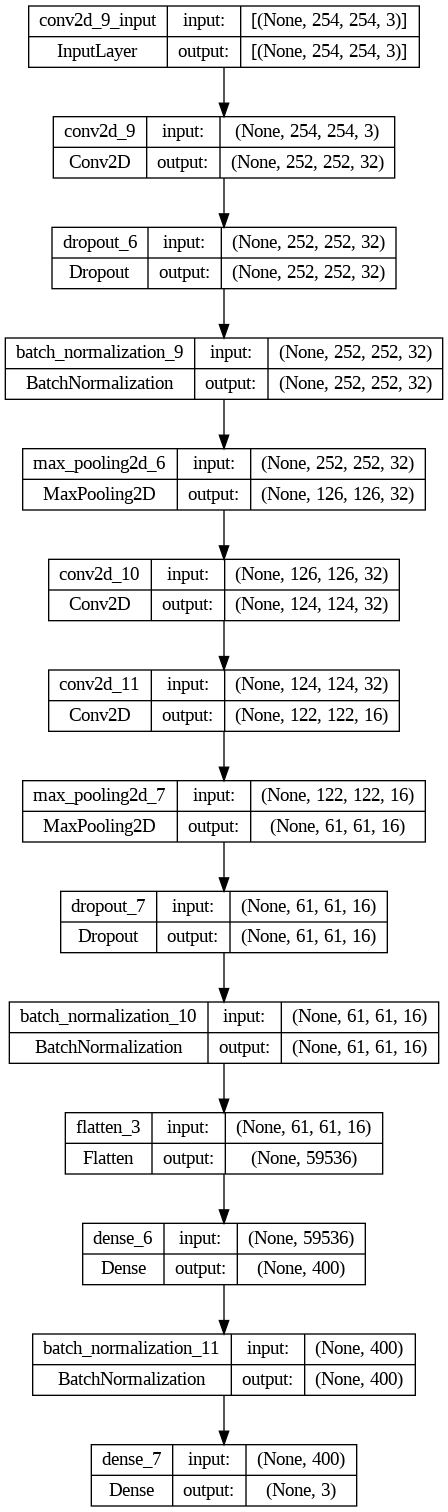

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True) #model structure

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',start_from_epoch=3,baseline=0.9,patience=0)

hist = model2.fit(data_augmentation1(train_img_T3),train_lab_T3, batch_size=380,epochs=40, validation_data=(valid_img_T3,valid_lab_T3),callbacks=[callback])

Epoch 1/40
3/3 [==============================] - 4s 587ms/step - loss: 0.7165 - accuracy: 0.6857 - val_loss: 12.6816 - val_accuracy: 0.3528
Epoch 2/40
3/3 [==============================] - 1s 255ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 10.0793 - val_accuracy: 0.3528
Epoch 3/40
3/3 [==============================] - 1s 254ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 6.9889 - val_accuracy: 0.3528
Epoch 4/40
3/3 [==============================] - 1s 254ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 4.5676 - val_accuracy: 0.3528
Epoch 5/40
3/3 [==============================] - 1s 263ms/step - loss: 8.4187e-04 - accuracy: 1.0000 - val_loss: 2.7572 - val_accuracy: 0.4528
Epoch 6/40
3/3 [==============================] - 1s 262ms/step - loss: 4.4922e-04 - accuracy: 1.0000 - val_loss: 1.5519 - val_accuracy: 0.5056
Epoch 7/40
3/3 [==============================] - 1s 253ms/step - loss: 3.3834e-04 - accuracy: 1.0000 - val_loss: 0.8027 - val_accuracy: 0.5861
Epoch 

##**Testing the model accuracy of ternary classification**

In [ ]:
test_loss,test_acc = model2.evaluate(data_augmentation1(X_test_images_T3),Y_test_labels_T3, verbose=1)
# need to expand your test images to include lake test images

19/19 [==============================] - 0s 11ms/step - loss: 0.3720 - accuracy: 0.9100


In [ ]:
print("The test accuracy for ternary classication is "+ str(test_acc*100)+"%")

The test accuracy for ternary classication is 91.00000262260437%


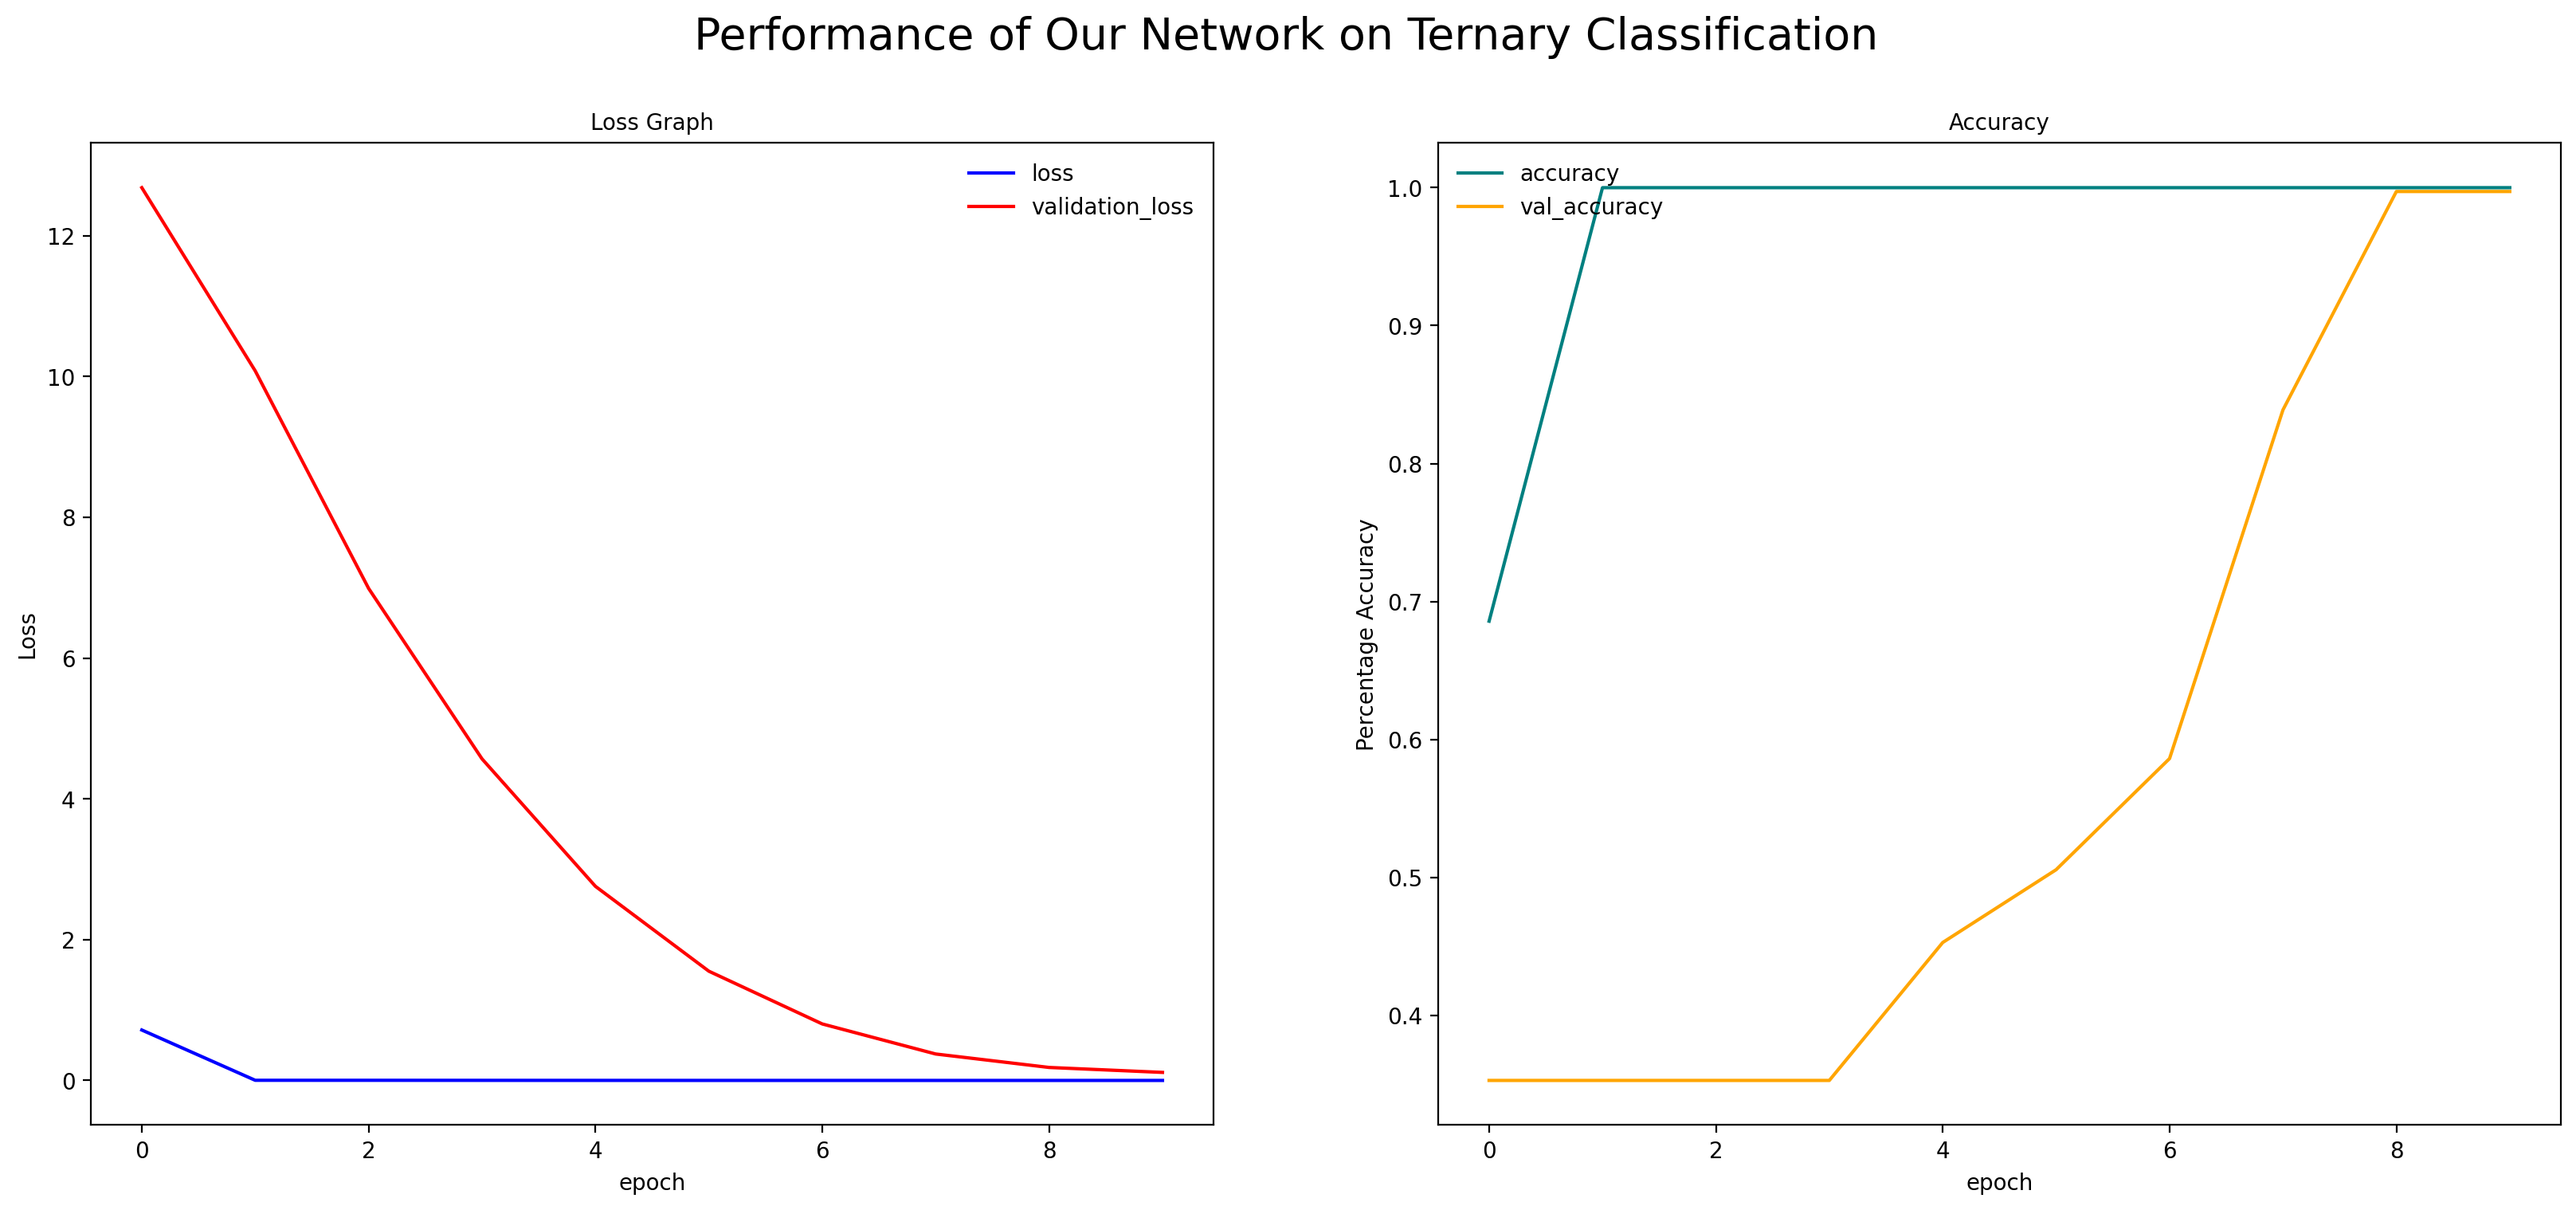

In [ ]:
#Subplot setting
fig,ax=plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Performance of Our Network on Ternary Classification',size=20)



ax[0].plot(hist.history['loss'],color='blue',label='loss')
ax[0].plot(hist.history['val_loss'],color='red',label='validation_loss')
ax[0].set_title("Loss Graph",fontsize=10)
ax[0].set_ylabel("Loss")
ax[0].set_xlabel('epoch')
ax[0].legend(loc='upper right')



ax[1].plot(hist.history['accuracy'], color='teal', label='accuracy')
ax[1].plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].set_title("Accuracy",fontsize=10)
ax[1].set_ylabel("Percentage Accuracy")
ax[1].set_xlabel('epoch')
ax[1].legend(loc='upper left')
fig.savefig('Performance of our Network on Ternary Classification')

## Comment on the performance plot
The performance is going quite well with the loss steadily trending downward which suggests the model is performing better and better after every single epoch.

In [ ]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["First 20th True Test_image_label", "Fire Label Prediction Precentage (%)", "No-Fire Label Prediction Percentage (%)", "Lake Label Prediction Percentage (%)"])

# Showing the first 20th prediction
Prediction = model2.predict(X_test_images_T3)[:19]
Fire_label_prediction = Prediction[:][:,0]
No_fire_label_prediction = Prediction[:][:,1]
Lake_label_prediction = Prediction[:][:,2]
for i in zip(Y_test_labels_T3[:19],Fire_label_prediction,No_fire_label_prediction,Lake_label_prediction):
    myTable.add_row([i[0],i[1]*100,i[2]*100,i[3]*100])

print(myTable)
print('Labels are defined as 0 and 1 corresponding to fire and no-fire images respectively')


19/19 [==============================] - 0s 10ms/step
+----------------------------------+--------------------------------------+-----------------------------------------+--------------------------------------+
| First 20th True Test_image_label | Fire Label Prediction Precentage (%) | No-Fire Label Prediction Percentage (%) | Lake Label Prediction Percentage (%) |
+----------------------------------+--------------------------------------+-----------------------------------------+--------------------------------------+
|               2.0                |          9.935910999774933           |           0.028177211061120033          |          90.03590941429138           |
|               0.0                |          50.80307126045227           |            35.48876643180847            |          13.708163797855377          |
|               1.0                |          66.91336035728455           |            21.583880484104156           |          11.502757668495178          |
|   

In [ ]:
# in this python cell, we want to find the precision and recall of our model

from sklearn.metrics import confusion_matrix, precision_score, recall_score

# finding the prediction from the probability predicted by the model
Prediction = model2.predict(X_test_images_T3)  # (400,2) which give the probability of fire and no-fire for an input image
y_pred = np.zeros(len(Prediction)) # storage for prediction 0,1 corresponding to fire and no-fire prediction

# we set a condition that if the probaility of fire is larger than the probability of no fire, take the prediction as fire
for i in range (len(Prediction)):
    if Prediction[i][0] > Prediction[i][1] and Prediction[i][0]> Prediction[i][2]:
        y_pred[i] = 0
    elif Prediction[i][1] > Prediction[i][0] and Prediction[i][1] > Prediction[i][2]:
        y_pred[i] = 1
    elif Prediction [i][2] > Prediction[i][0] and Prediction[i][2] > Prediction[i][1]:
        y_pred[i] = 2

# Assuming y_true contains your true labels and y_pred contains your model predictions
y_true = Y_test_labels_T3 # True labels
y_pred = y_pred # Prediction labels

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)



print(f"Precision: {precision}, Recall: {recall}")

19/19 [==============================] - 0s 10ms/step
Precision: 1.0, Recall: 0.78


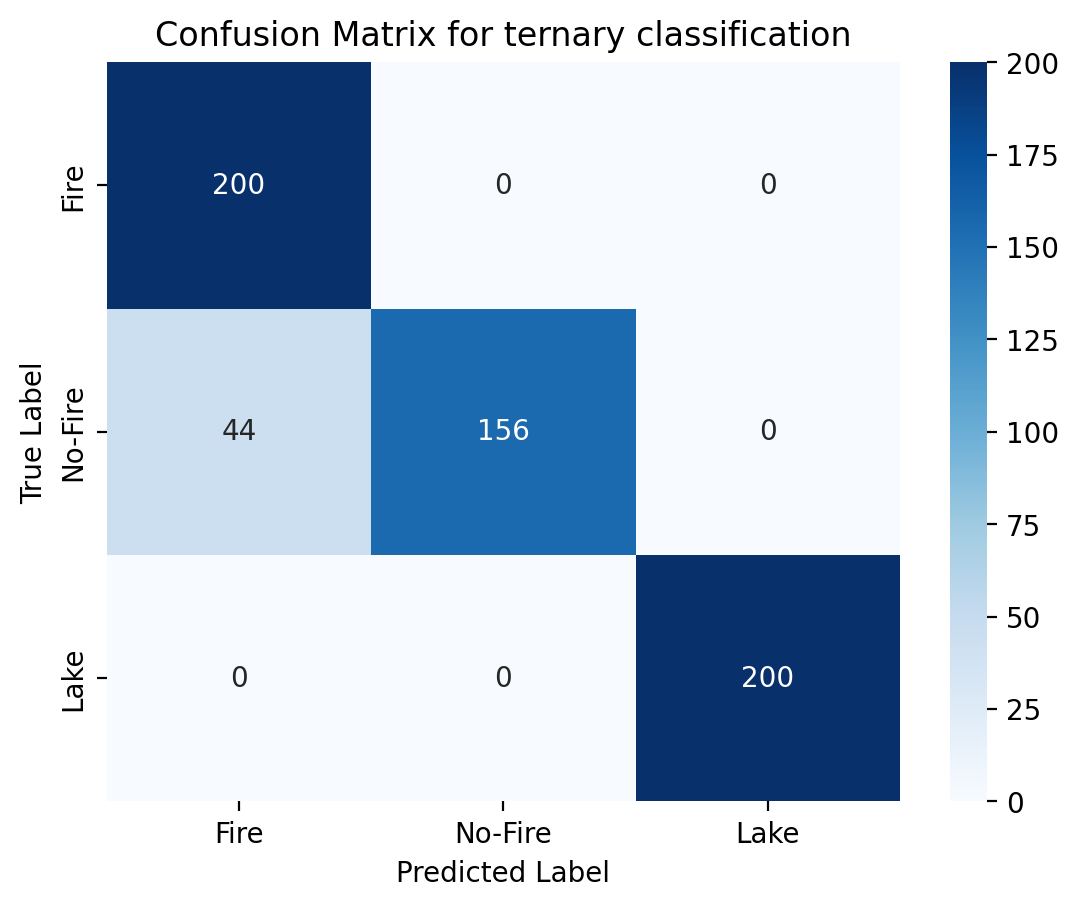

In [ ]:
# Plotting the confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns  # For nicer looking plots

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fire', 'No-Fire', 'Lake'], yticklabels=['Fire', 'No-Fire', 'Lake'])
plt.title('Confusion Matrix for ternary classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Comment on the ternary Confusion Matrix plot
Similar to the binary Confusion matrix plot, we now have 3 classes rather than 2 classes. Surprisingly, there is no false prediction for the lake images which might be due to the fact that the model is primarily picking the snow features for the fire and no-fire and the sky-feature for the lake images.

In [ ]:
# tabulating our performance metric into a table
from prettytable import PrettyTable

# training set performance metric
accuracy_training = round(hist.history['accuracy'][-1],4) *100
loss_training = round(hist.history['loss'][-1],4)

# validation set performance metric
accuracy_valid = round(hist.history['val_accuracy'][-1],4)*100
loss_valid = round(hist.history['val_loss'][-1],4)

# testing set performance metric
loss_test = round(test_loss,4)
accuracy_test = round(test_acc,4)*100
precision_test = round(precision,4)*100
recall_test = round(recall,4)*100

# creating table
Binary_Classification_M = PrettyTable(["Dataset", "Loss", "Accuracy(%)",'Precision (%)','Recall(%)'])
Binary_Classification_M.add_row(['Training Set', loss_training, accuracy_training, '--', '--' ])
Binary_Classification_M.add_row(['Validation Set', loss_valid, accuracy_valid, '--', '--' ])
Binary_Classification_M.add_row(['Testing Set', loss_test, accuracy_test, precision_test, recall_test ])

print(Binary_Classification_M)

+----------------+--------+-------------+---------------+-----------+
|    Dataset     |  Loss  | Accuracy(%) | Precision (%) | Recall(%) |
+----------------+--------+-------------+---------------+-----------+
|  Training Set  | 0.0003 |    100.0    |       --      |     --    |
| Validation Set | 0.1143 |    99.72    |       --      |     --    |
|  Testing Set   | 0.372  |     91.0    |     100.0     |    78.0   |
+----------------+--------+-------------+---------------+-----------+


## Comment on the table
The table summarises the performance metric for our model which has an accuracy of 91% as well as high precision and recall.

## **Visualising the effect of Convolutional Layer on Images**


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization
model3=Sequential()

model3.add(Conv2D(32, (3,3), activation='relu', input_shape=(254,254,3)))
model3.add(Dropout(0.3))
model3.add(BatchNormalization())
model3.add(MaxPooling2D())

model3.add(Conv2D(32, (3,3), activation='relu'))

model3.add(Conv2D(16, (3,3), activation='relu'))
model3.add(MaxPooling2D())
model3.add(Dropout(0.3))
model3.add(BatchNormalization())
model3.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 252, 252, 32)      896       
                                                                 
 dropout_8 (Dropout)         (None, 252, 252, 32)      0         
                                                                 
 batch_normalization_12 (Ba  (None, 252, 252, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 conv2d_14 (Conv2D)          (None, 122, 122, 16)     

Those are the lake test image's feature maps of the last convolutional layer for the untrained model (in latent space)
1/1 [==============================] - 0s 194ms/step


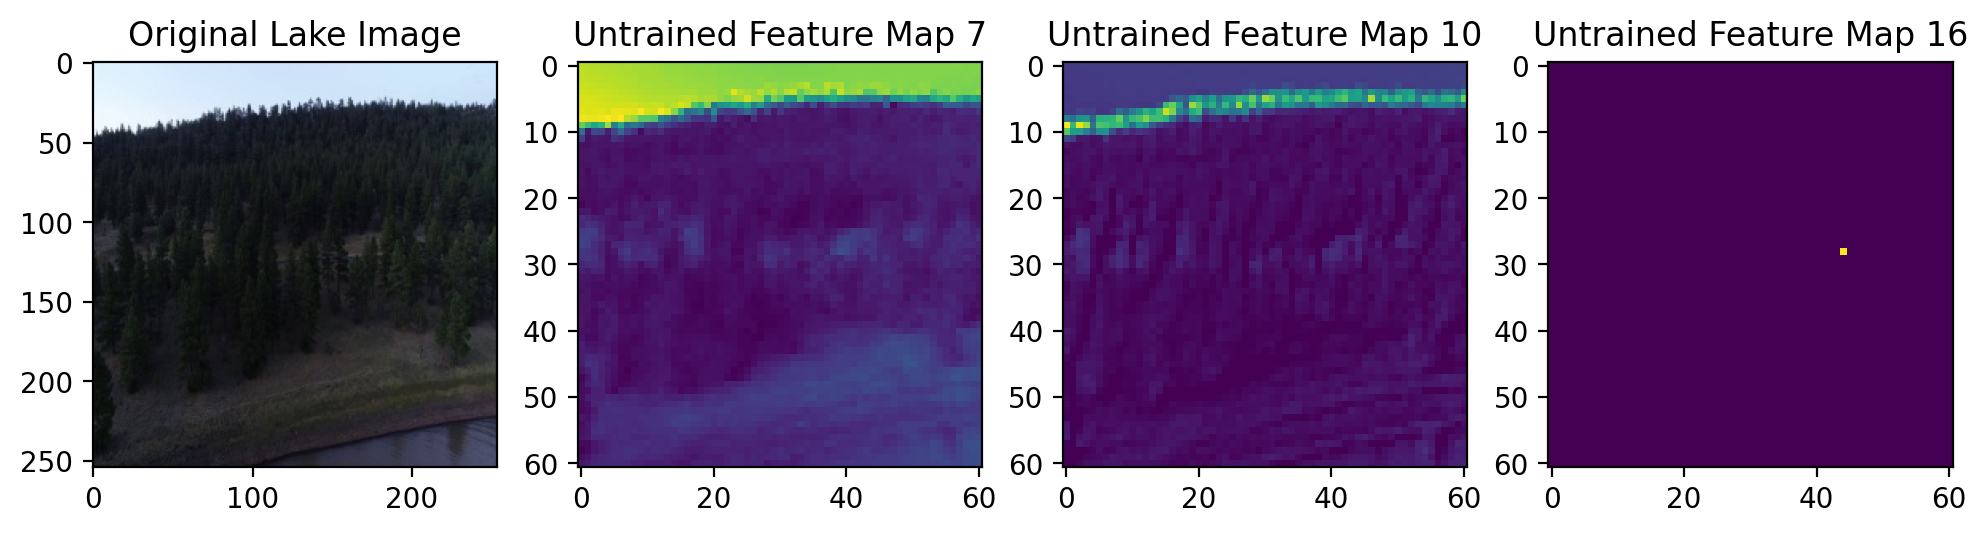

In [ ]:
# visualising the last convolutional layer of the untrained model

print("Those are the lake test image's feature maps of the last convolutional layer for the untrained model (in latent space)")
g=model3.predict(np.array([X_test_images_T3[0]]))
# plots of non-trained model's features maps
fig,ax=plt.subplots(1,4,figsize=(12,12))

ax[0].imshow(X_test_images_T3[0])
ax[0].set_title('Original Lake Image')

ax[1].imshow(g[0][:,:,6])
ax[1].set_title('Untrained Feature Map 7')

ax[2].imshow(g[0][:,:,9])
ax[2].set_title('Untrained Feature Map 10')

ax[3].imshow(g[0][:,:,15])
ax[3].set_title('Untrained Feature Map 16')

fig.savefig('Ternary Classification: Last Convolutional Layer untrained model for lake-image')


Those are the no-fire test image's feature maps of the last convolutional layer for the untrained model (in latent space)
1/1 [==============================] - 0s 21ms/step


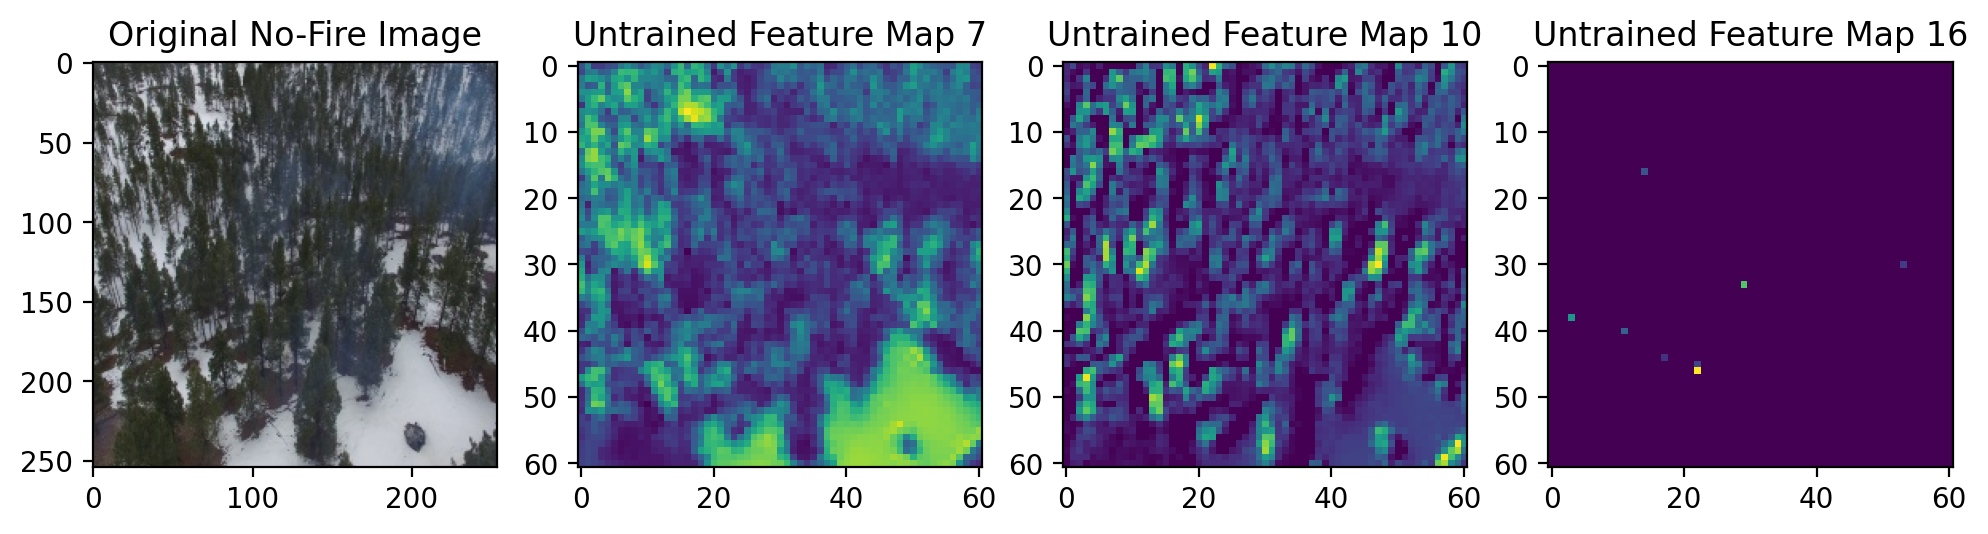

In [ ]:

# visualising the last convolutional layer of the untrained model

print("Those are the no-fire test image's feature maps of the last convolutional layer for the untrained model (in latent space)")
g=model3.predict(np.array([X_test_images_T3[2]]))
# plots of non-trained model's features maps
fig,ax=plt.subplots(1,4,figsize=(12,12))

ax[0].imshow(X_test_images_T3[2])
ax[0].set_title('Original No-Fire Image')

ax[1].imshow(g[0][:,:,6])
ax[1].set_title('Untrained Feature Map 7')

ax[2].imshow(g[0][:,:,9])
ax[2].set_title('Untrained Feature Map 10')

ax[3].imshow(g[0][:,:,15])
ax[3].set_title('Untrained Feature Map 16')

fig.savefig('Ternary Classification: Last Convolutional Layer untrained model for no-fire image')


Those are the fire test image's feature maps of the last convolutional layer for the untrained model (in latent space)
1/1 [==============================] - 0s 25ms/step


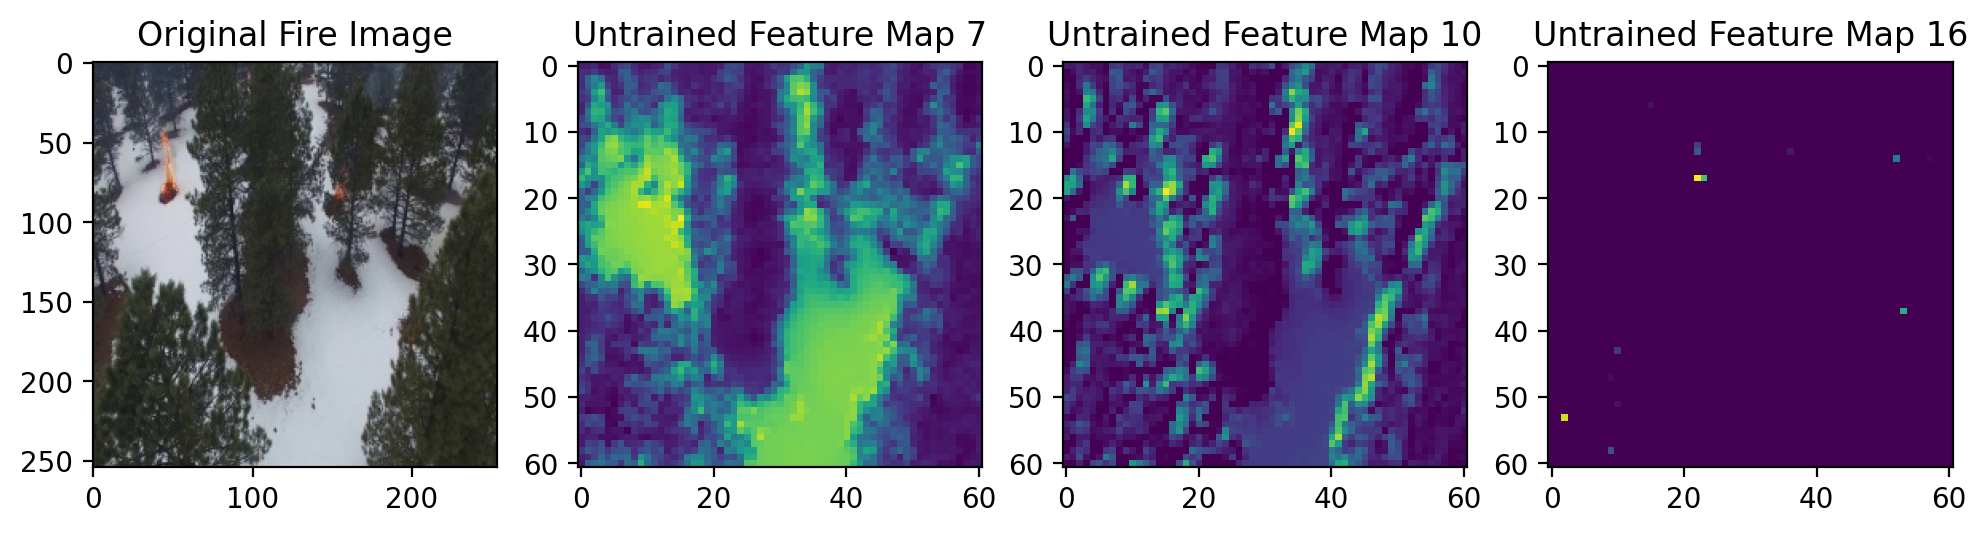

In [ ]:

# visualising the last convolutional layer of the untrained model

print("Those are the fire test image's feature maps of the last convolutional layer for the untrained model (in latent space)")
g=model3.predict(np.array([X_test_images_T3[1]]))
# plots of non-trained model's features maps
fig,ax=plt.subplots(1,4,figsize=(12,12))

ax[0].imshow(X_test_images_T3[1])
ax[0].set_title('Original Fire Image')

ax[1].imshow(g[0][:,:,6])
ax[1].set_title('Untrained Feature Map 7')

ax[2].imshow(g[0][:,:,9])
ax[2].set_title('Untrained Feature Map 10')

ax[3].imshow(g[0][:,:,15])
ax[3].set_title('Untrained Feature Map 16')

fig.savefig('Ternary Classification: Last Convolutional Layer untrained model for fire image')


In [ ]:
# Taking the output of last convolutional layer of the trained model
layer_name = 'batch_normalization_10'
intermediate_layer_model=keras.Model(inputs=model2.input,outputs=model2.get_layer(layer_name).output)

intermediate_output=intermediate_layer_model(X_test_images_T3)



Those are the lake test image's feature maps of the last convolutional layer for the trained model (in latent space)
1/1 [==============================] - 0s 22ms/step


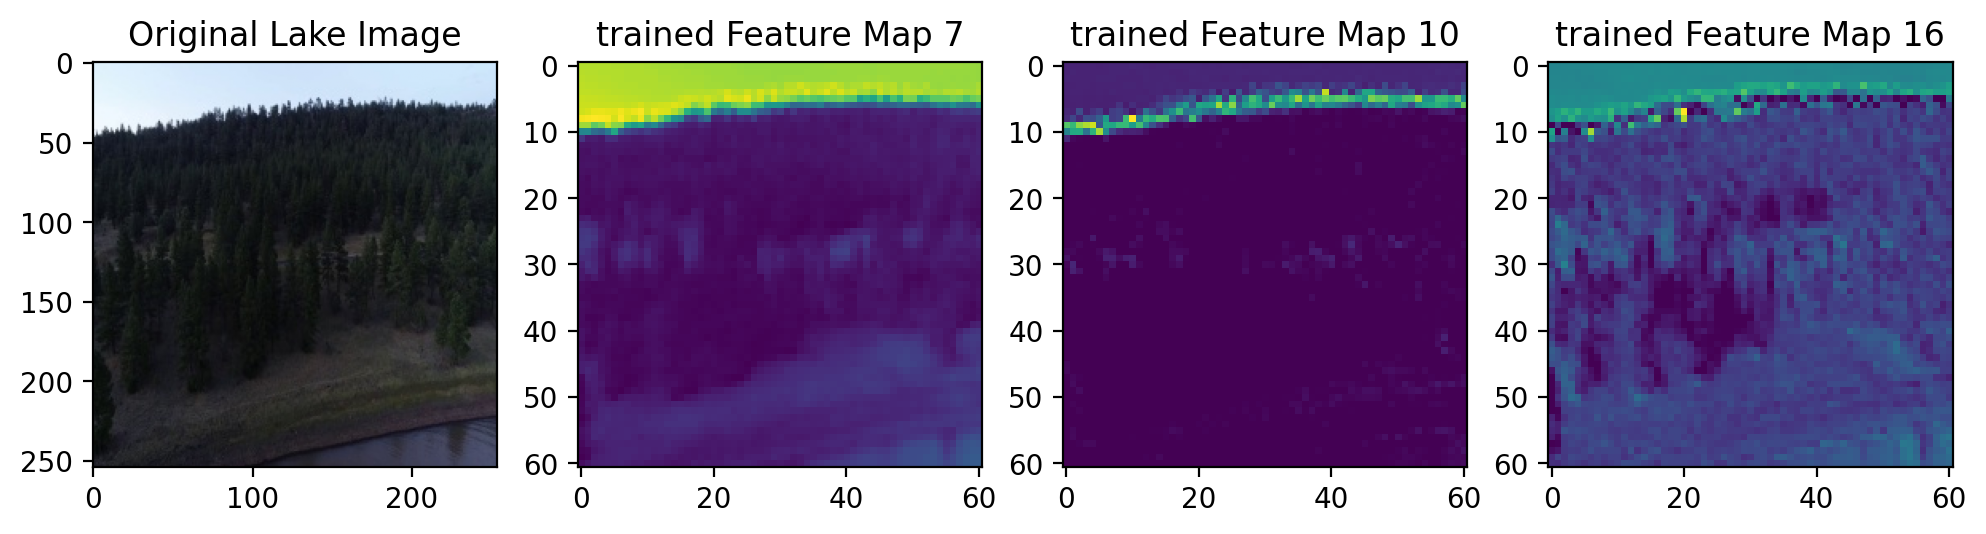

In [ ]:
# visualising the last convolutional layer of the untrained model

print("Those are the lake test image's feature maps of the last convolutional layer for the trained model (in latent space)")
g=model3.predict(np.array([X_test_images_T3[0]]))
# plots of non-trained model's features maps
fig,ax=plt.subplots(1,4,figsize=(12,12))

ax[0].imshow(X_test_images_T3[0])
ax[0].set_title('Original Lake Image')

ax[1].imshow(intermediate_output[0,:,:,6])
ax[1].set_title('trained Feature Map 7')

ax[2].imshow(intermediate_output[0,:,:,9])
ax[2].set_title('trained Feature Map 10')

ax[3].imshow(intermediate_output[0,:,:,15])
ax[3].set_title('trained Feature Map 16')

fig.savefig('Ternary Classification: Last Convolutional Layer trained model for lake-image')


Those are the no-fire test image's feature maps of the last convolutional layer for the trained model (in latent space)


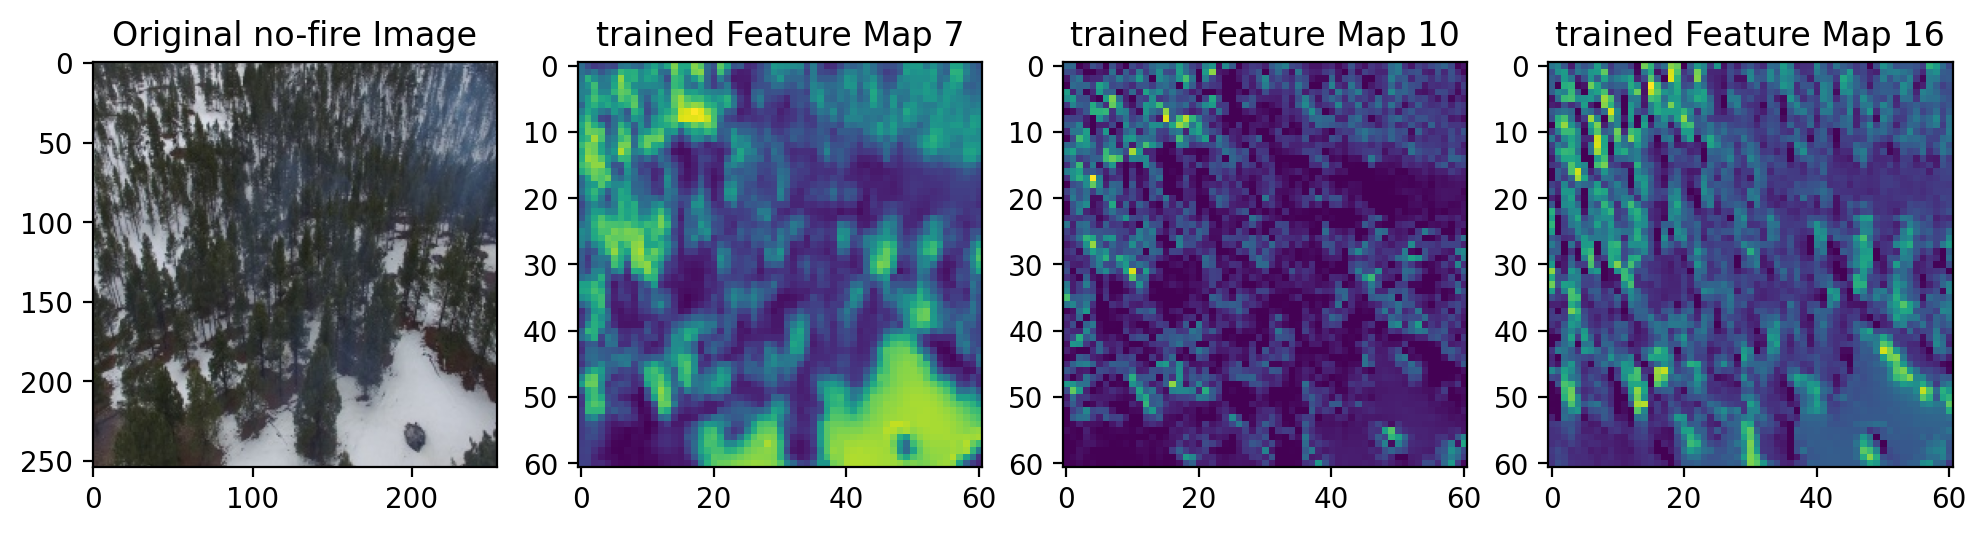

In [ ]:
# visualising the last convolutional layer of the untrained model

print("Those are the no-fire test image's feature maps of the last convolutional layer for the trained model (in latent space)")

# plots of non-trained model's features maps
fig,ax=plt.subplots(1,4,figsize=(12,12))

ax[0].imshow(X_test_images_T3[2])
ax[0].set_title('Original no-fire Image')

ax[1].imshow(intermediate_output[2,:,:,6])
ax[1].set_title('trained Feature Map 7')

ax[2].imshow(intermediate_output[2,:,:,9])
ax[2].set_title('trained Feature Map 10')

ax[3].imshow(intermediate_output[2,:,:,15])
ax[3].set_title('trained Feature Map 16')

fig.savefig('Ternary Classification: Last Convolutional Layer trained model for no-fire image')


Those are the fire test image's feature maps of the last convolutional layer for the trained model (in latent space)
1/1 [==============================] - 0s 22ms/step


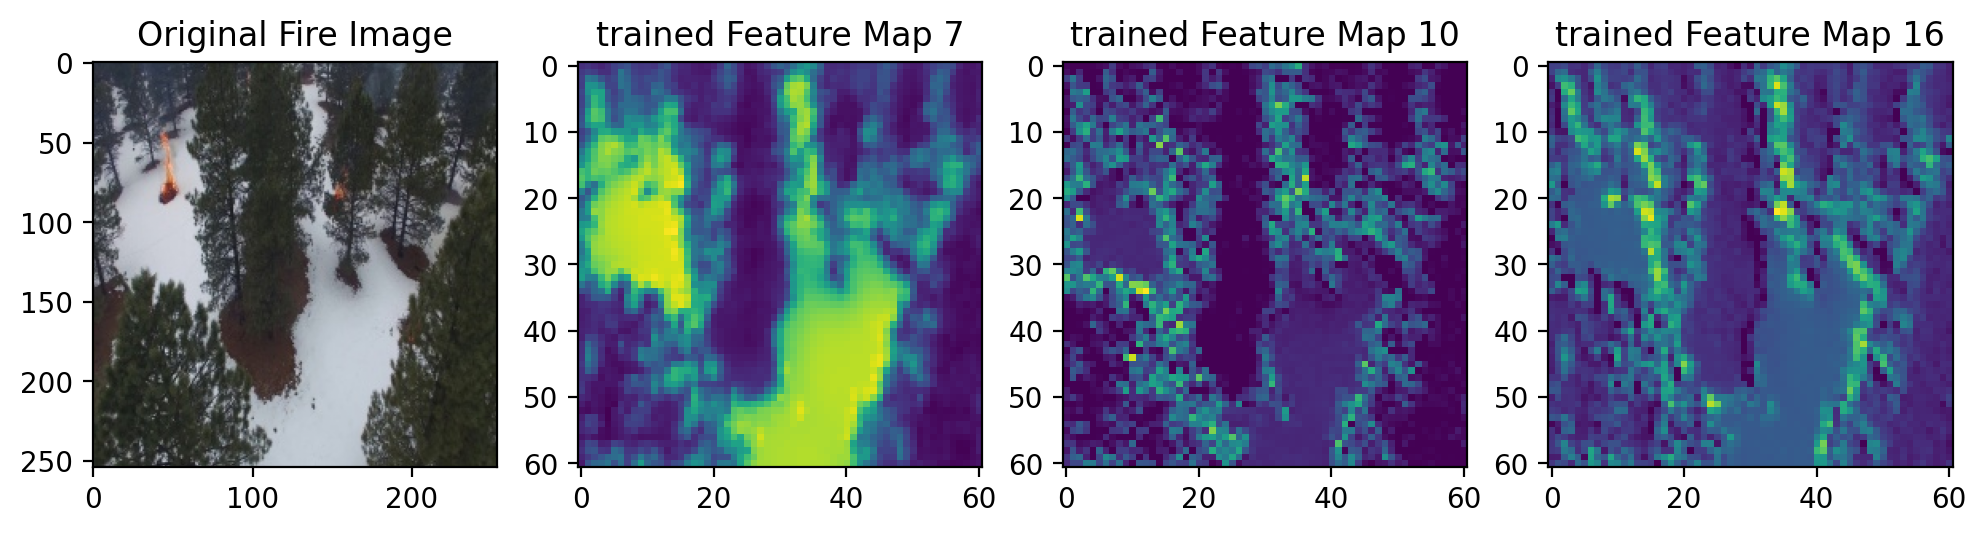

In [ ]:
# visualising the last convolutional layer of the untrained model

print("Those are the fire test image's feature maps of the last convolutional layer for the trained model (in latent space)")
g=model3.predict(np.array([X_test_images_T3[1]]))
# plots of non-trained model's features maps
fig,ax=plt.subplots(1,4,figsize=(12,12))

ax[0].imshow(X_test_images_T3[1])
ax[0].set_title('Original Fire Image')

ax[1].imshow(intermediate_output[1,:,:,6])
ax[1].set_title('trained Feature Map 7')

ax[2].imshow(intermediate_output[1,:,:,9])
ax[2].set_title('trained Feature Map 10')

ax[3].imshow(intermediate_output[1,:,:,15])
ax[3].set_title('trained Feature Map 16')

fig.savefig('Ternary Classification: Last Convolutional Layer trained model for fire image')


## Comment on the visualisation
We can see that the model have manage to pick up some of the fire pixel in the trained feature map 16. However, the model is primarily picking the snow feature for the fire and no-fire images and the sky feature for the lake images.